# Lab 4: CCD Characterization
Carter Merrill
Astro 480

___


### Introduction

This lab explores the charcterization of a CCD. Below I will demonstrate how to get valuable information about and imaging CCD from the data produced from a flat image

### Procedure

*Include information about from the header here*
This should be about the data acquisition

### Ananlysis

**Gain and Read Noise** 

The reported gain for the ST-10 is 1.3e<sup>-</sup>/ADU

Because none of the flats are exposed for the same duration, to calculate the gain, I will need to use two regions from the same exposure.
That said, When I calculate the gain across the entire chip, I get very different results for different regions

In [69]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

We can inspect all of the images by looking at their headers.

In [70]:
imageList = glob.glob('data/Lab4/*.fits*') 
imageData = [fits.open(a) for a in imageList]
keys = list(imageData[0][0].header.keys())

dic = {'Files' : imageList}

for i in keys[9:-15]: # Choose the columns you care about
    dic.update( {i : [a[0].header[i] for a in imageData]} )

imageInfo = pd.DataFrame(data = dic) # Making it a dataframe makes it easier to look at

The above cell takes all of the information from the headers of all the files in the data/ folder and puts them in a dataframe so they can all be inspected at once

In [71]:
imageInfoSorted = imageInfo.sort_values(['EXPTIME']) # We really are interested in if any of the flats have the same exposure time
imageInfoSorted

,Files,DATE-OBS,INSTRUME,EXPTIME,CCD-TEMP,IMAGETYP,CFWHEEL
0,data/Lab4/480_2018_.Bias(0.0S0X1).07.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8
1,data/Lab4/480_2018_.Bias(0.0S0X1).01.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,0.2,Bias,CFW_8
19,data/Lab4/480_2018_.Bias(0.0S0X1).02.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-1.1,Bias,CFW_8
18,data/Lab4/480_2018_.Bias(0.0S0X1).10.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8
4,data/Lab4/480_2018_.Bias(0.0S0X1).09.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8
17,data/Lab4/480_2018_.Bias(0.0S0X1).08.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8
8,data/Lab4/480_2018_.Bias(0.0S0X1).11.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8
9,data/Lab4/480_2018_.Bias(0.0S0X1).06.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,-0.2,Bias,CFW_8
21,data/Lab4/480_2018_.Bias(0.0S0X1).05.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,0.2,Bias,CFW_8
16,data/Lab4/480_2018_.Bias(0.0S0X1).04.fits,2018-04-27T22:33:46.843,SBIG ST-10 3 CCD Camera,0.12,0.2,Bias,CFW_8


The above cell sorts all of the information according to exposure time. Many of the columns are excluded from the table as they are exactly the same for all of the fits files.

To calculate the gain I will use the file with the 45 second exposure as well as two of the bias. 

In [220]:
flatData = imageData[10][0].data.astype(np.int32)
biasData1 = imageData[0][0].data.astype(np.int32)
biasData2 = imageData[4][0].data.astype(np.int32) # Choose two biases with same CCD temp to keep things consistent

Any of the flats will work for exposure < ~60. After around 60 seconds the gain looks like it gets really wierd

To calculate the gain and the read noise, I will use the following equations:

Gain = (F1_mean + F2_mean) - (B1_mean + B2_mean) / (Var_f1-f2 - Var_b1-b2)

and for read noise

readNoise = Gain * Sigma_b1-b2 / sqrt(2)

In [221]:
biasMean1 = np.mean(biasData1)
biasMean2 = np.mean(biasData2)
sigmab1b2 = np.std(biasData1 - biasData2)

Once again, the flat data will have to be chopped up since none of the flats have the same exposure time.

In [222]:
flatData.shape

(1472, 2184)

In [238]:
# center of the image is at 1092,736

center = 736
sizeArray = np.arange(6, 200, 2, dtype = int) # Create an array with the delta of the columns
sub_gain = np.zeros(len(sizeArray)) # Create an array to store the gains



row1 = [ 736 - a for a in sizeArray] # Create arrays with the beginning and ending row/columns of all the regions
row2 = [ 736 + a for a in sizeArray]
col1 = [ 1092 - int(a/2) for a in sizeArray]
col2 = [ 1092 + int(a/2) for a in sizeArray]

Lets visulize the area we will use to approximate the gain

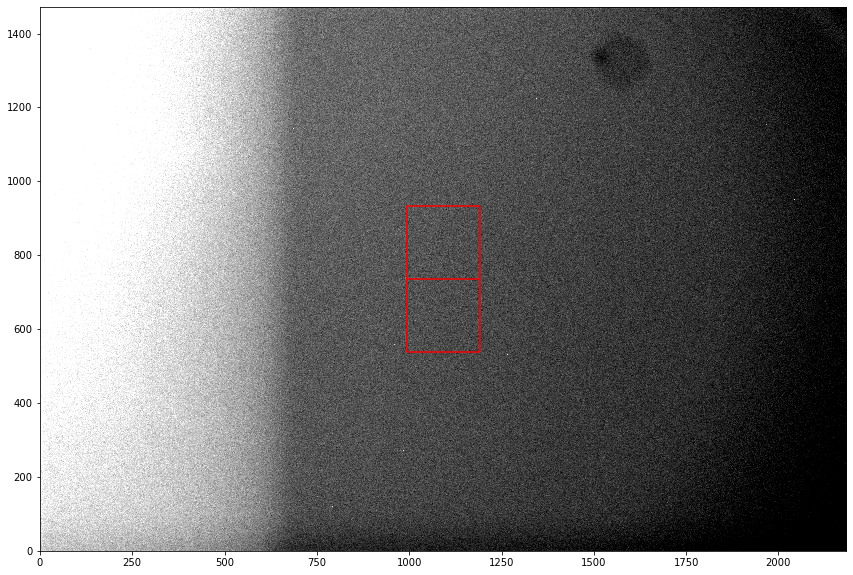

In [239]:
plt.figure(figsize=(20, 10))

plt.imshow(flatData, vmin=np.percentile(flatData, 5), vmax=np.percentile(flatData, 90),
           origin='lower', cmap='binary_r', interpolation='nearest')
# First region
plt.vlines(col1[-1], center, row2[-1], colors = 'r')
plt.vlines(col2[-1],center, row2[-1], colors = 'r')
plt.hlines(row2[-1], col1[-1], col2[-1], colors = 'r')

# Second Region
plt.vlines(col1[-1], row1[-1], center, colors = 'r')
plt.vlines(col2[-1], row1[-1], center, colors = 'r')
plt.hlines(row1[-1], col1[-1], col2[-1], colors = 'r')

plt.hlines(736, col1[-1], col2[-1], colors = 'r')

Now I will create a plot of the gain versus the number of pixels sampled in order to see what the appropriate smaple size is:

In [240]:
# Calculate the means for all the regions

for i, a in enumerate(sizeArray):

    sub_mean_f1 = np.mean(flatData[row1[i]:center, col1[i]:col2[i]])
    sub_mean_f2 = np.mean(flatData[center:row2[i], col1[i]:col2[i]])
    sub_mean_b1 = np.mean(biasData1[row1[i]:center, col1[i]:col2[i]])
    sub_mean_b2 = np.mean(biasData2[row1[i]:center, col1[i]:col2[i]])
    sub_sigma_f1f2 = np.std(flatData[row1[i]:center, col1[i]:col2[i]] - flatData[center:row2[i], col1[i]:col2[i]])
    sub_sigma_b1b2 = np.std(biasData1[row1[i]:center, col1[i]:col2[i]] - biasData2[row1[i]:center, col1[i]:col2[i]])
   
    sub_gain[i] = ((sub_mean_f1 + sub_mean_f2) - (sub_mean_b2 + sub_mean_b2)) / (sub_sigma_f1f2**2 - sub_sigma_b1b2**2) 
    sub_read_noise = sub_gain * sub_sigma_b1b2 / np.sqrt(2)

Text(0, 0.5, 'Measured Gain')

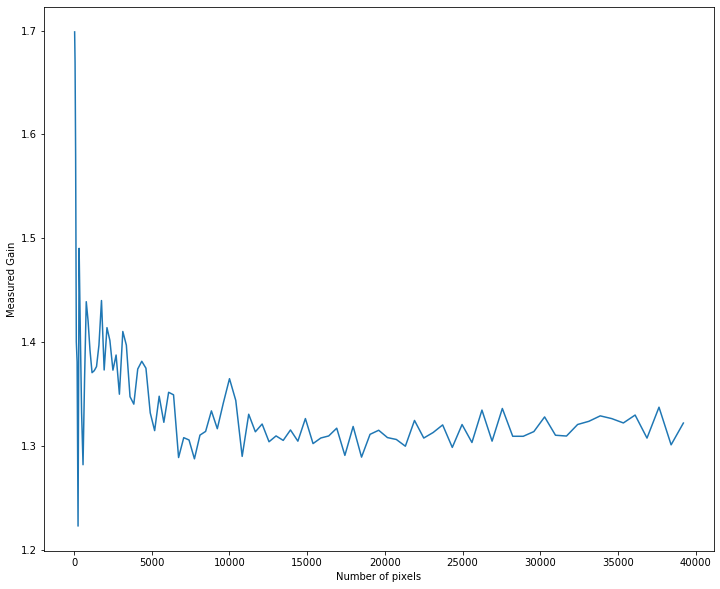

In [241]:
# Plot the means as a funcion of the pixels sampled
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12, 10)
x = sizeArray**2
plt.plot(x, sub_gain)
ax.set_xlabel('Number of pixels')
ax.set_ylabel('Measured Gain')


Looks like for a flat exposure of 10 seconds, the gain is more or less constant for all N. This suggests that provided that N is greater than 100,000 the calculation of the gain will be correct.  
It's worth pointing out that for the longer exposures, even for the 5 second exposure, the gain falls off for larger values if N. Once the exposure time is greater than ~45 seconds, the values calculated for the gain become non sensical (gain ~50). 


_Why does the accuracy of the gain apporoximation fall of for larger values of N?_

In [242]:
gain = sub_gain[-1]

That was literally like 8 hours of work

Now for the read noise. Read noise in ADU is: 

sigma_read = read_noise / gain

In [245]:
readNoise = sigmab1b2 / np.sqrt(2) 
print("The measured value of the gain is {0:0.4f} and the measured value of the read noise is {1:0.4f}".format(gain, readNoise))

The measured value of the gain is 1.3221 and the measured value of the read noise is 8.4424


The stated value of the gain is 1.3e<sup>-</sup>/ADU. The measured value presented above is in good agreement with this value.

**Linearity**



### Results

*Pretty straightforward*


### Resources
